In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Sessile Biomass

In [15]:
import pandas as pd
import os

base_dir = 'scan_results_2.3/'  # current directory
all_runs = []

for folder_name in os.listdir(base_dir):
    if folder_name == 'base_': 
        continue
    folder_path = os.path.join(base_dir, folder_name)
    if os.path.isdir(folder_path):
        m_file = os.path.join(folder_path, 'Mtot_fraction.dat')
        eps_file = os.path.join(folder_path, 'EPS_fraction.dat')
        auto_file = os.path.join(folder_path, 'autoinducer.dat')
        n_file = os.path.join(folder_path, 'Ntot_fraction.dat')
        i_file = os.path.join(folder_path, 'enzyme.dat')
        if os.path.exists(m_file) and os.path.exists(eps_file):
            m_df = pd.read_csv(m_file, sep=r'\s+', header=None, names=['time', 'M'])
            eps_df = pd.read_csv(eps_file, sep=r'\s+', header=None, names=['time', 'EPS'])
            a_df = pd.read_csv(auto_file, sep=r'\s+', header=None, names=['time', 'A'])
            n_df = pd.read_csv(n_file, sep=r'\s+', header=None, names=['time', 'N'])
            i_df = pd.read_csv(i_file, sep=r'\s+', header=None, names=['time', 'I'])
            
            df = m_df.merge(eps_df, on='time')
            df = df.merge(a_df, on='time')
            df = df.merge(n_df, on='time')
            df = df.merge(i_df, on='time')
            df = df.rename(columns={'M': f'M_{folder_name}', 'EPS': f'EPS_{folder_name}', 'A': f'A_{folder_name}', 'N': f'N_{folder_name}', 'I': f'I_{folder_name}'})
            all_runs.append(df.set_index('time'))

combined_df = pd.concat(all_runs, axis=1)
df = combined_df.reset_index()  # time becomes a column again

print(df.head())


    time  M_E_crit_0.1  EPS_E_crit_0.1  A_E_crit_0.1  N_E_crit_0.1  \
0      0      0.000750        0.000250      0.000000  0.000000e+00   
1   3600      0.000834        0.000264      0.136209  2.886550e-10   
2   7200      0.000926        0.000279      0.166027  7.512580e-10   
3  10800      0.001028        0.000294      0.185858  1.498570e-09   
4  14400      0.001142        0.000310      0.206518  2.985060e-09   

   I_E_crit_0.1  M_mu_2.777777778e-05  EPS_mu_2.777777778e-05  \
0      0.000000              0.000750                0.000500   
1      0.004595              0.000714                0.000511   
2      0.012682              0.000681                0.000519   
3      0.021182              0.000652                0.000524   
4      0.029642              0.000624                0.000527   

   A_mu_2.777777778e-05  N_mu_2.777777778e-05  ...  M_mu_e_2.314814814e-05  \
0              0.000000              0.000000  ...                0.000750   
1              0.125391         

## EPS

## Merge

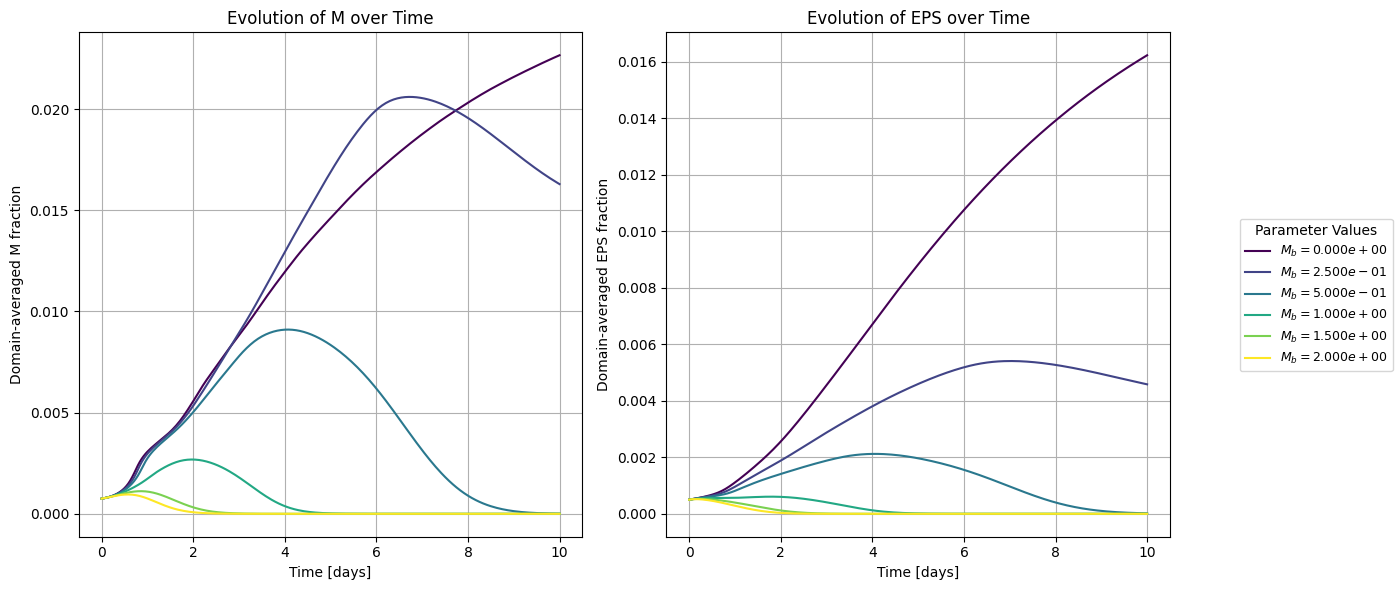

In [28]:
import re
import numpy as np
import matplotlib.pyplot as plt

# Extract numeric part from the column name
def extract_number(col):
    match = re.search(r"[-+]?\d*\.?\d+(?:[eE][-+]?\d+)?", col)
    if match:
        return float(match.group())
    return float("inf")

def tau_label(col):
    """Convert column name like M_tau_0.01 → 'τ=0.01'"""
    num = extract_number(col)
    return rf"$M_{{b}}={num:.{3}e}$"  # nice LaTeX-style label

m_columns = [col for col in df.columns if re.match(r"^M_M_b_[-+]?\d*\.?\d+(?:[eE][-+]?\d+)?$", col)]

eps_columns = [col for col in df.columns if re.match(r"^EPS_M_b_[-+]?\d*\.?\d+(?:[eE][-+]?\d+)?$", col)]

# # exclude_vals = {0.05, 0.15}

# m_columns = [col for col in df.columns
#              if re.match(r"^M_eps_disp_death[-+]?\d*\.?\d+(?:[eE][-+]?\d+)?$", col)
#              and extract_number(col) not in exclude_vals]

# eps_columns = [col for col in df.columns
#                if re.match(r"^EPS_eps_disp_death_[-+]?\d*\.?\d+(?:[eE][-+]?\d+)?$", col)
#                and extract_number(col) not in exclude_vals]

# Select and sort relevant columns
m_columns.sort(key=extract_number)

eps_columns.sort(key=extract_number)


# Use same colormap for both sets (so same τ → same color)
taus = [extract_number(c) for c in m_columns]  # assume both have same τs
colors = plt.cm.viridis(np.linspace(0, 1, len(taus)))

# Side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), sharex=True)

# --- Left plot: M_tau_* ---
for col, color in zip(m_columns, colors):
    ax1.plot(df["time"]/86400, df[col], label=tau_label(col), color=color)
ax1.set_xlabel("Time [days]")
ax1.set_ylabel("Domain-averaged M fraction")
ax1.set_title("Evolution of M over Time")
ax1.grid(True)

# --- Right plot: EPS_tau_* ---
for col, color in zip(eps_columns, colors):
    ax2.plot(df["time"]/86400, df[col], label=tau_label(col), color=color)
ax2.set_xlabel("Time [days]")
ax2.set_ylabel("Domain-averaged EPS fraction")
ax2.set_title("Evolution of EPS over Time")
ax2.grid(True)

# --- Single shared legend ---
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc="center right", fontsize=9, title="Parameter Values")

plt.tight_layout(rect=[0, 0, 0.85, 1])  # leave space for legend
# plt.savefig("M_EPS_eps_disp_death.png", dpi=300, bbox_inches="tight")

plt.show()



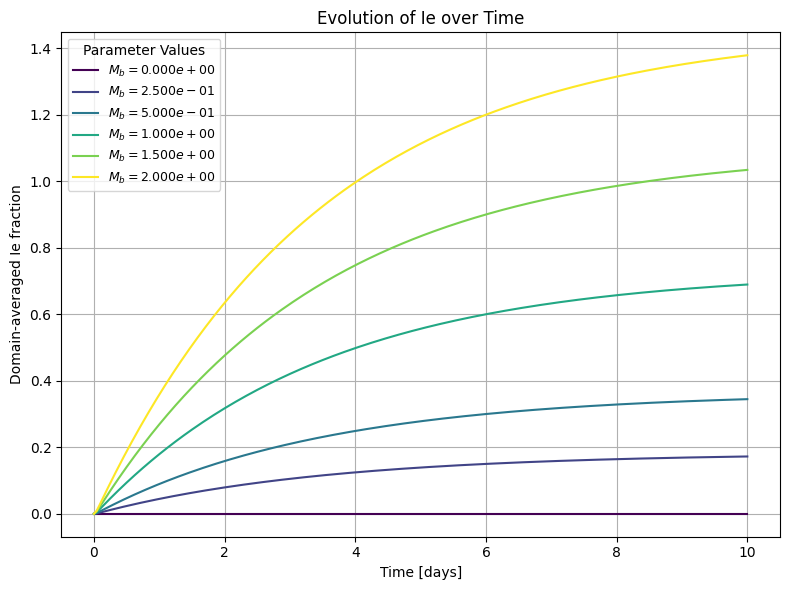

In [33]:
import re
import numpy as np
import matplotlib.pyplot as plt

# Extract numeric part from the column name
def extract_number(col):
    match = re.search(r"[-+]?\d*\.?\d+(?:[eE][-+]?\d+)?", col)
    if match:
        return float(match.group())
    return float("inf")

def tau_label(col):
    """Convert column name like M_tau_0.01 → 'τ=0.01'"""
    num = extract_number(col)
    return rf"$M_b={num:.{3}e}$"

# Get only M columns
m_columns = [col for col in df.columns if re.match(r"^I_M_b_[-+]?\d*\.?\d+(?:[eE][-+]?\d+)?$", col)]
m_columns.sort(key=extract_number)

# Colors
taus = [extract_number(c) for c in m_columns]
colors = plt.cm.viridis(np.linspace(0, 1, len(taus)))

# --- Single plot ---
fig, ax = plt.subplots(figsize=(8,6))

for col, color in zip(m_columns, colors):
    ax.plot(df["time"]/86400, df[col], label=tau_label(col), color=color)

ax.set_xlabel("Time [days]")
ax.set_ylabel("Domain-averaged Ie fraction")
ax.set_title("Evolution of Ie over Time")
ax.grid(True)

# Legend
ax.legend(fontsize=9, title="Parameter Values")

plt.tight_layout()
# plt.savefig("M_only.png", dpi=300, bbox_inches="tight")
plt.show()


NameError: name 'ax2' is not defined

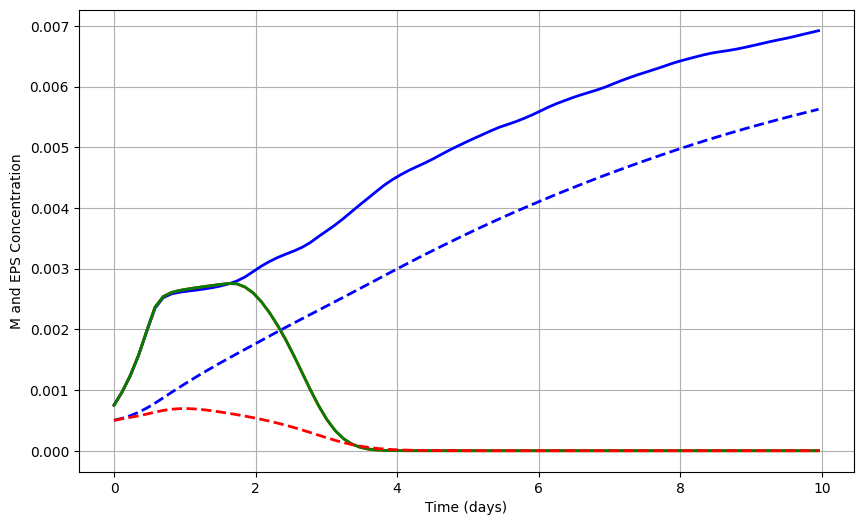

In [7]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10,6))

# Left axis: M and EPS
ax1.plot(df['time_days'], df['M_base_autoinducer_40'], label='M 40', color='blue', linewidth=2)
ax1.plot(df['time_days'], df['M_enzyme_autoinducer_40'], label='M 40E', color='red', linewidth=2)
ax1.plot(df['time_days'], df['M_enzyme_autoinducer_60'], label='M 60E', color='green', linewidth=2)


ax1.plot(df['time_days'], df['EPS_base_autoinducer_40'], label='EPS 40', color='blue', linewidth=2, linestyle='--')
ax1.plot(df['time_days'], df['EPS_enzyme_autoinducer_40'], label='EPS 40E', color='red', linewidth=2, linestyle='--')

ax1.set_xlabel('Time (days)')
ax1.set_ylabel('M and EPS Concentration')
ax1.grid(True)

# Right axis: Autoinducer A
# ax2 = ax1.twinx()
# ax2.plot(df['time_days'], df['A_base_autoinducer_40'], label='A 40', color='green', linewidth=2)
# ax2.plot(df['time_days'], df['A_enzyme_autoinducer_40'], label='A 40E', color='orange', linewidth=2)
# ax2.set_ylabel('Autoinducer (A)')

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title('M, EPS, and Autoinducer over Time under Different Conditions')
plt.tight_layout()
plt.show()


In [26]:

biomass_df = pd.read_csv('biomass_0.dat', 
                 sep=r'\s+',   
                 header=None, 
                 names=['time', 'B']) 

print(biomass_df.head())


FileNotFoundError: [Errno 2] No such file or directory: 'biomass_0.dat'

In [ ]:
plt.plot(biomass_df["time"] / (60*60*24), biomass_df["B"])
plt.xlabel("Days")
plt.ylabel("B")
plt.show()
